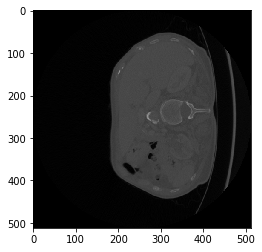

In [55]:
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
import numpy as np
import cv2
img = cv2.imread("/content/drive/My Drive/rezolvare/107-HU.png") 
plt.imshow(img)

import matplotlib.image as mpimg
from matplotlib.pyplot import figure

In [59]:
img.shape

(512, 512, 3)

In [60]:
row_size= img.shape[0]
col_size = img.shape[1]
print(row_size, col_size )

512 512


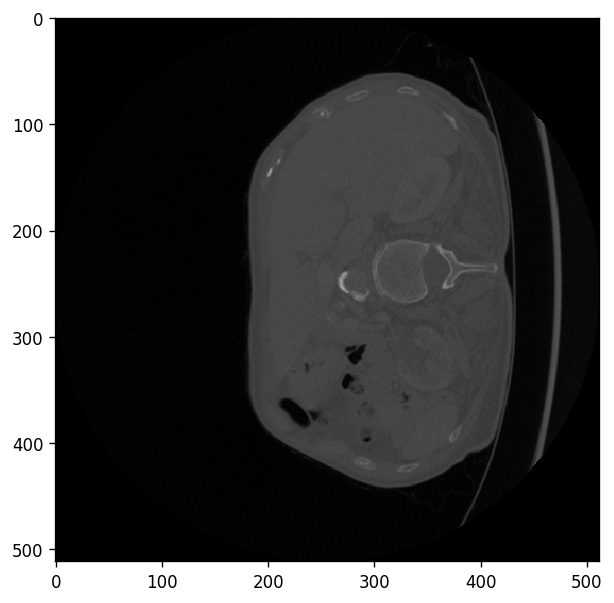

In [63]:
figure(num=None, figsize=(8, 6), dpi=120)
img = cv2.imread("/content/drive/My Drive/rezolvare/107-HU.png") 
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-45.0
30.862197759456368


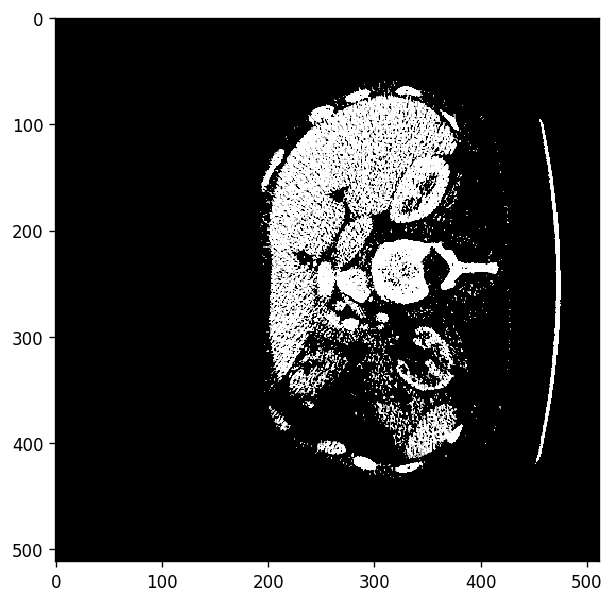

In [69]:
mean = np.mean(img)
print(mean)
std = np.std(img)
print(std)
img = img-mean-46

figure(num=None, figsize=(8, 6), dpi=120)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


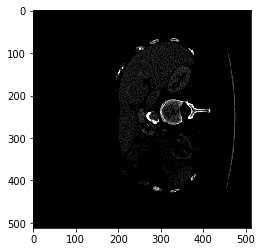

In [70]:
img = img/std
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.6517107061890431
3.0346329193449315
-2.2469092854727983


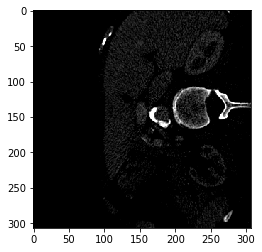

In [71]:
# Find the average pixel value near the lungs
# to renormalize washed out images
middle = img[int(col_size/5):int(col_size/5*4),int(row_size/5):int(row_size/5*4)]
plt.imshow(middle)
mean = np.mean(middle)
print(mean)
max = np.max(img)
print(max)
min = np.min(img)
print(min)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


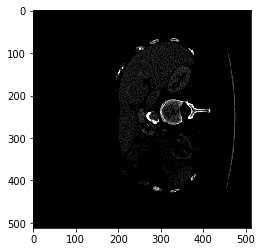

In [72]:
# To improve threshold finding, I'm moving the 
# underflow and overflow on the pixel spectrum
img[img==max]=mean
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


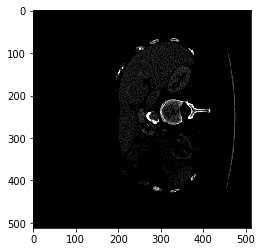

In [73]:
img[img==min]=mean
plt.imshow(img)

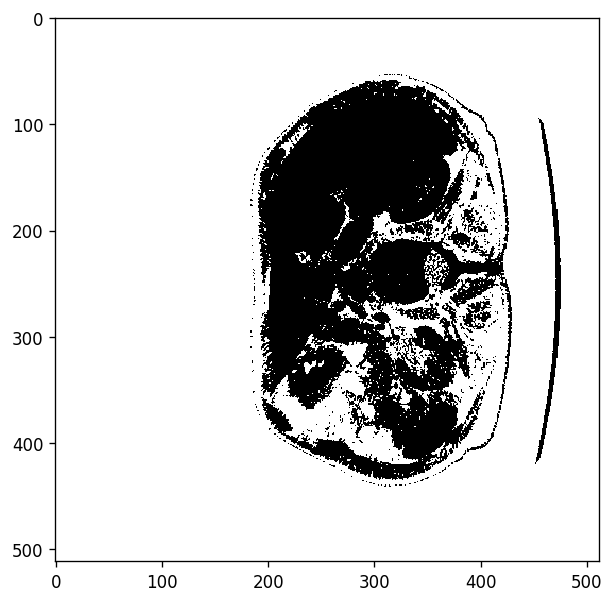

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(middle,[np.prod(middle.shape),1]))
centers = sorted(kmeans.cluster_centers_.flatten())
threshold = np.mean(centers)
thresh_img = np.where(img<threshold,1.0,0.0)

figure(num=None, figsize=(8, 6), dpi=120)
plt.imshow(thresh_img)